<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/SUU-Data-Analytics-1-6100/Module%204%20Boston%20realestate%20linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Exercise - Linear Regression



### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

### Import Necessary Libraries

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set() will load seaborn's default theme and color palette to the session.
sns.set()
# split the data into train and test
from sklearn.model_selection import train_test_split
# to built linear regression_model using statsmodels
import statsmodels.api as sm
# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error



### Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 4/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Check the shape of the dataset

In [ ]:
df.head()    # complete the code

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


### Get the info regarding column datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Get summary statistics for the numerical columns

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


**For the column `CHAS`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [ ]:
df['CHAS']=df["CHAS"].replace({1:"yes",0:"no"})
df.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,no,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,no,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,no,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,no,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,no,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [ ]:
df['CHAS'].value_counts()   # Value count for the columns 'CHAS'

### Exploratory Data Analysis

**Univariate Analysis**

**Plot the distribution plots for all the numerical features and list your observations.**

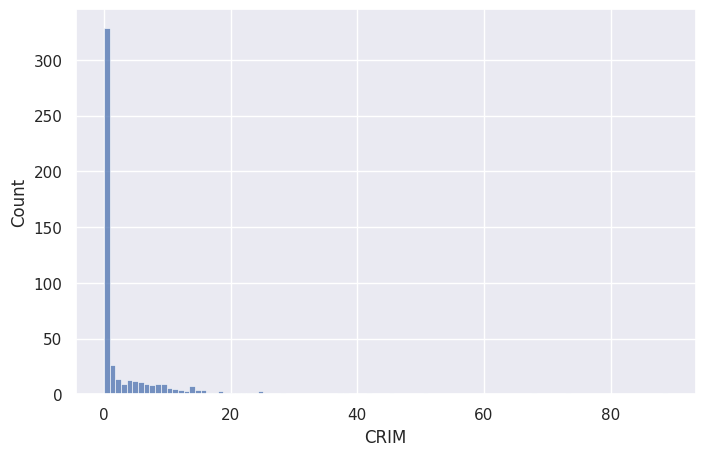

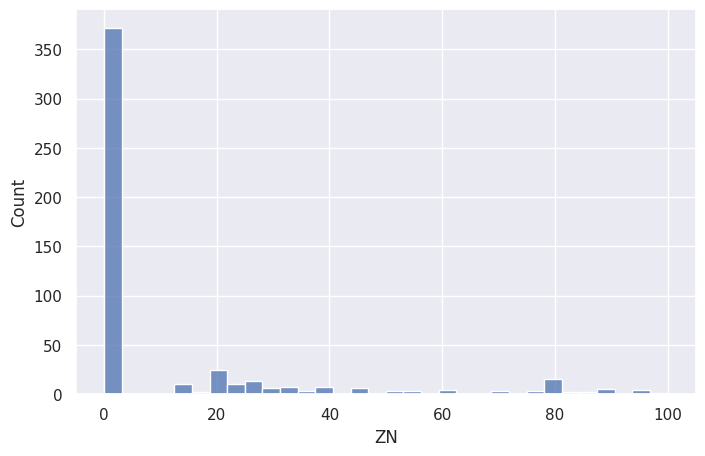

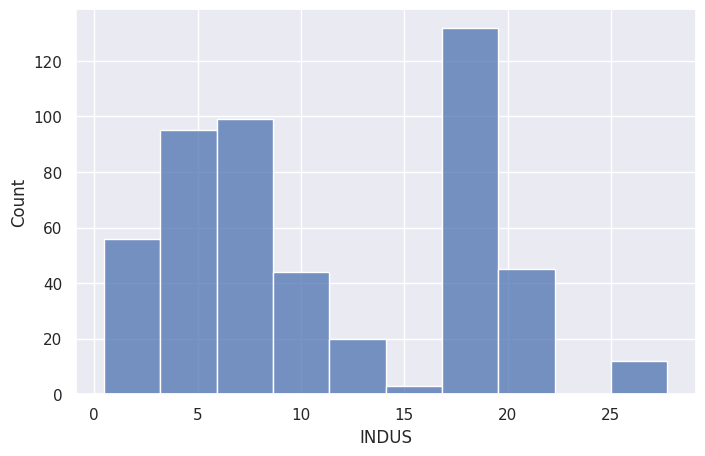

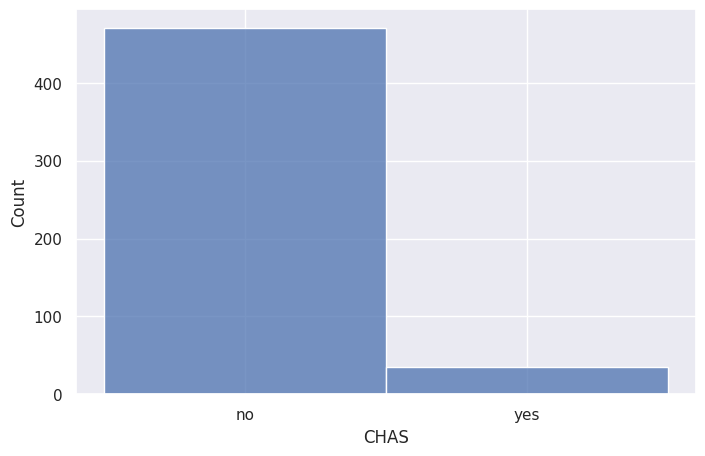

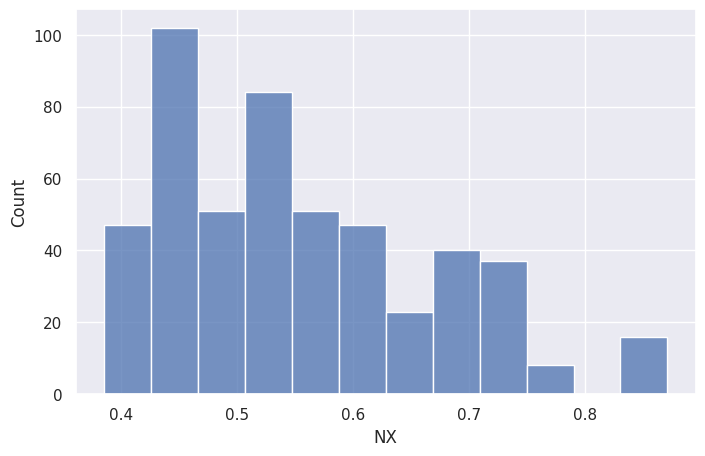

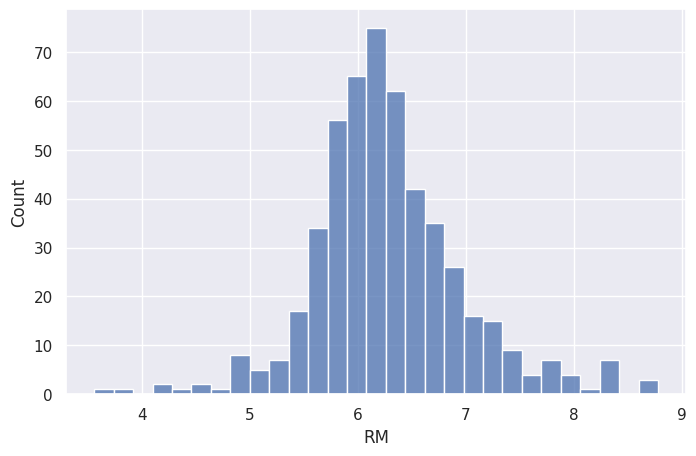

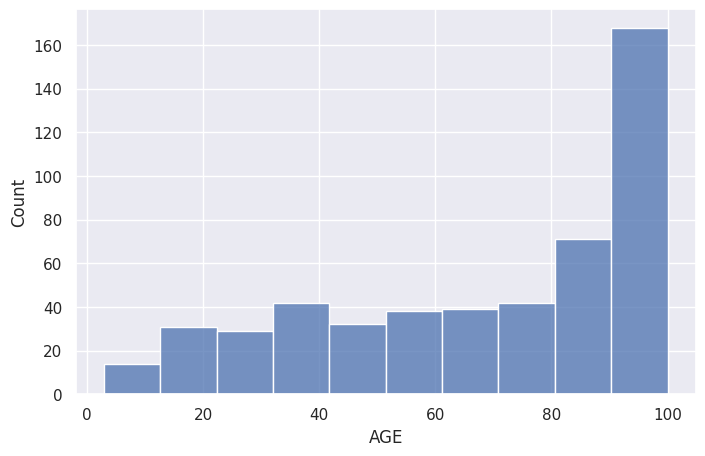

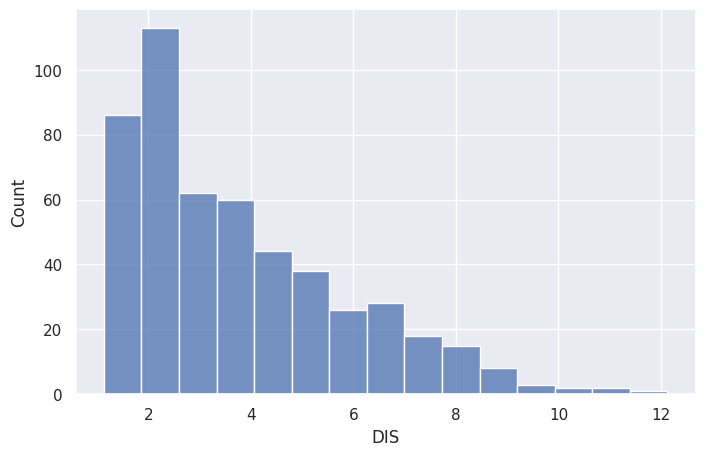

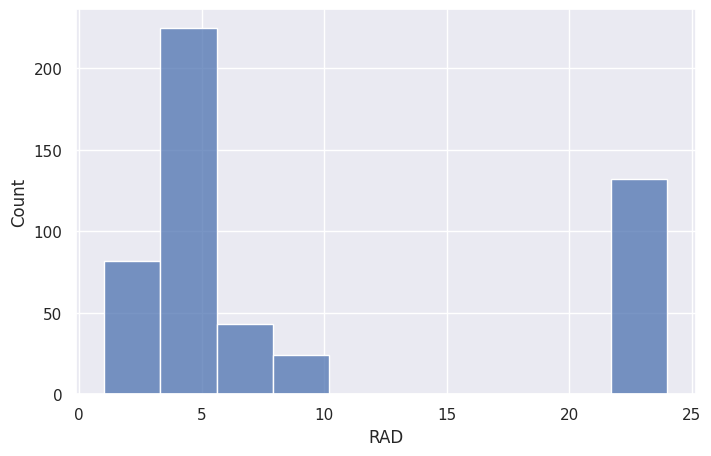

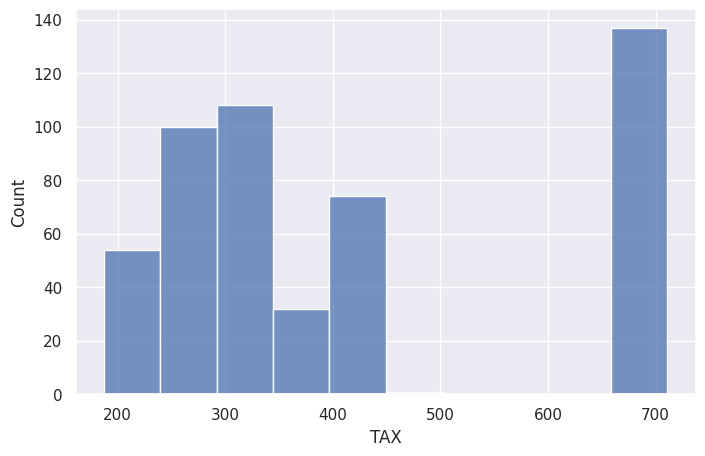

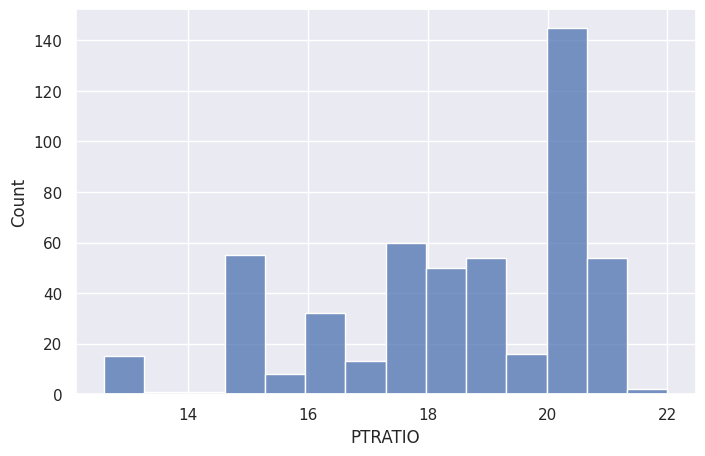

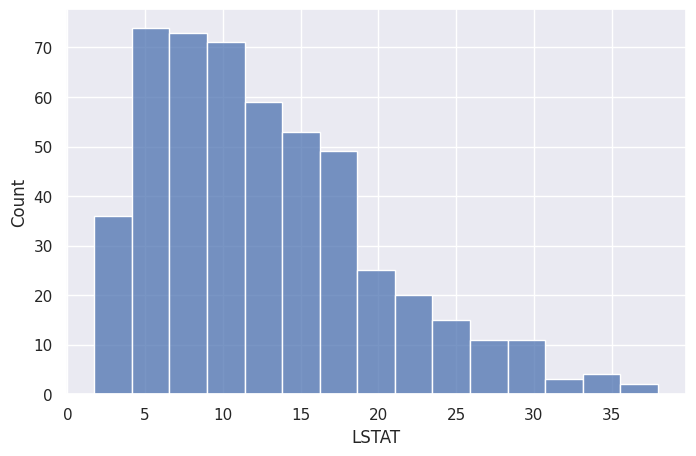

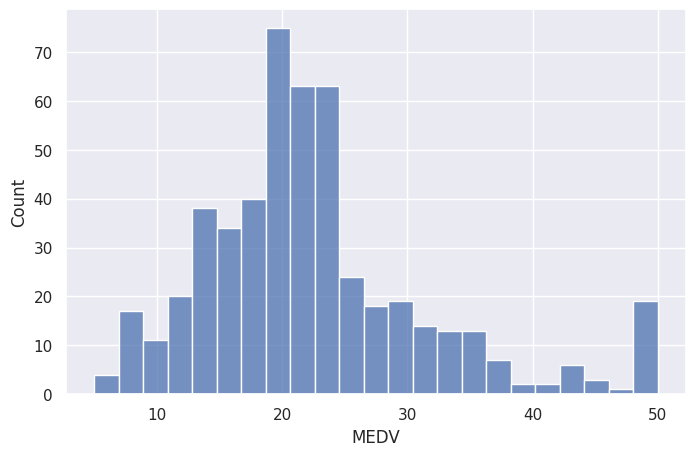

In [ ]:
# let's plot all the columns to look at their distributions
for i in df.columns:
  plt.figure(figsize=(8,5))
  sns.histplot(data=df,x=i)
  plt.show()

**Multivariate Analysis**

**Plot the scatterplots for features and the target variable `MEDV` and list your observations.**

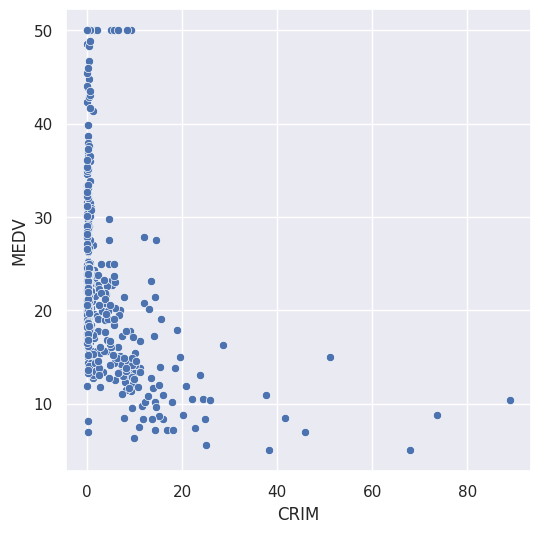

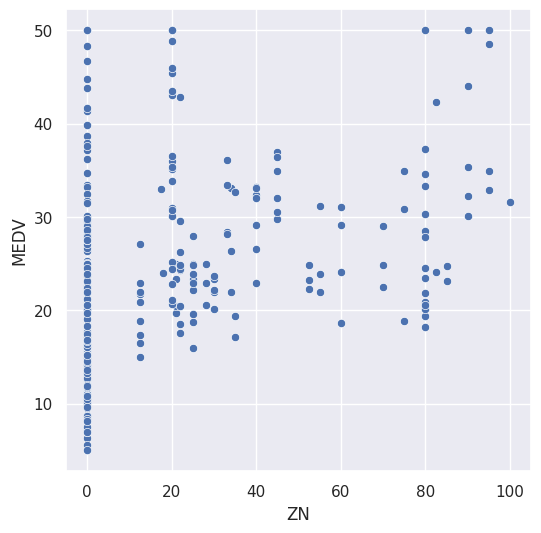

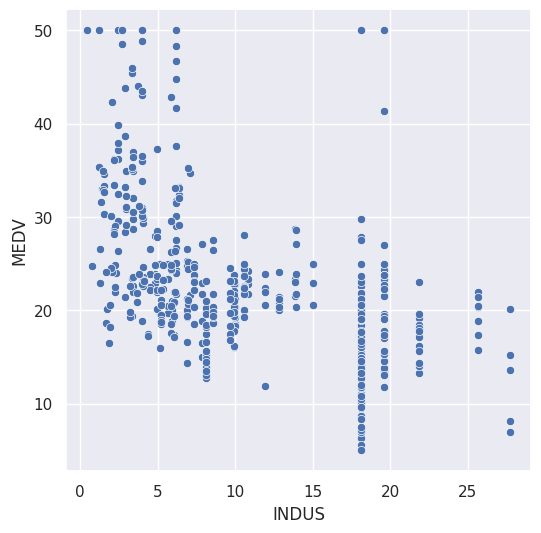

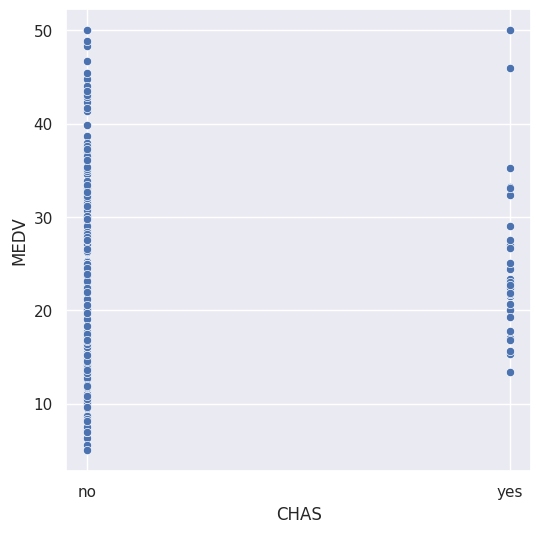

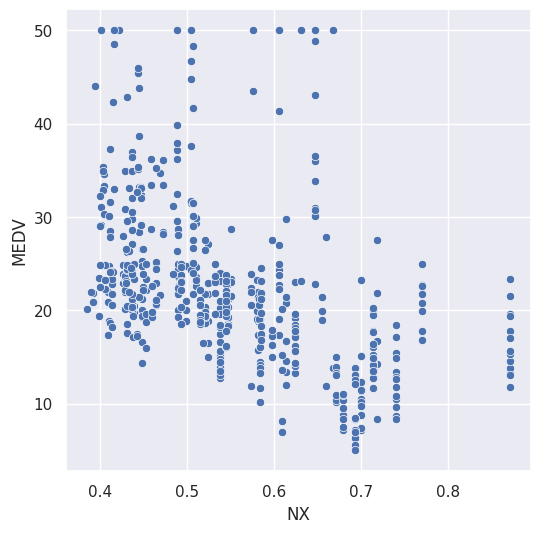

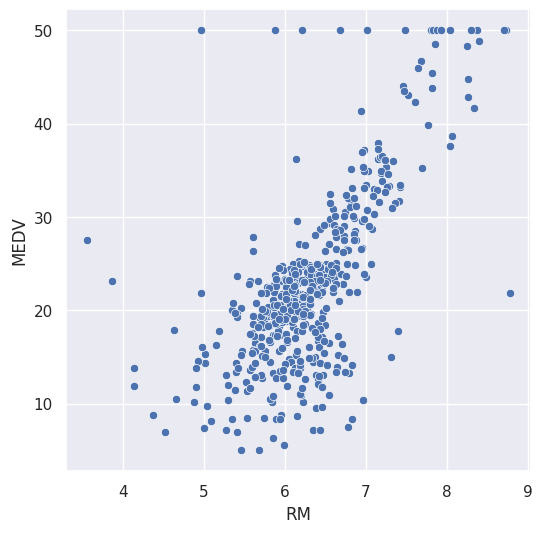

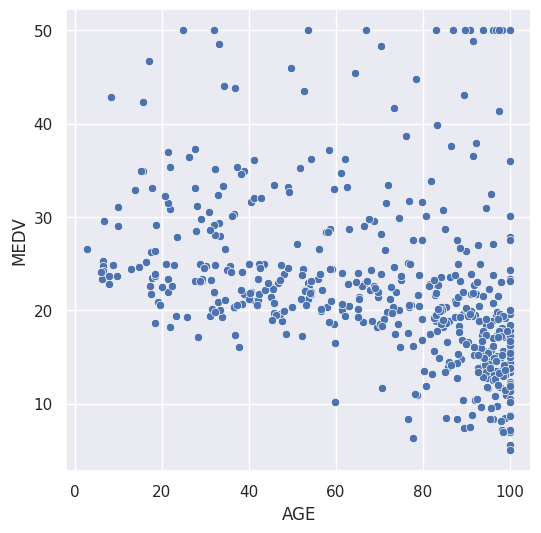

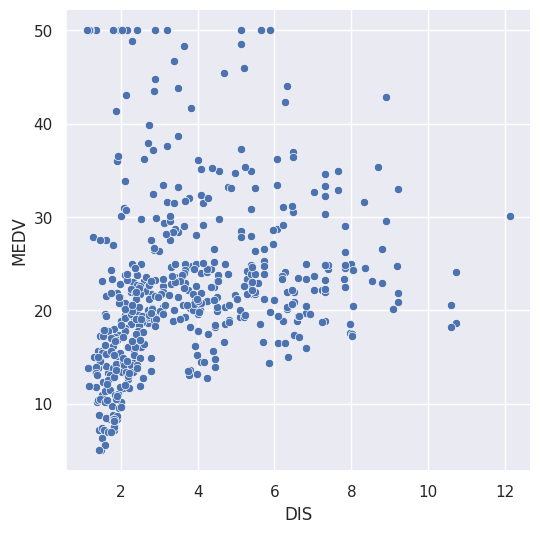

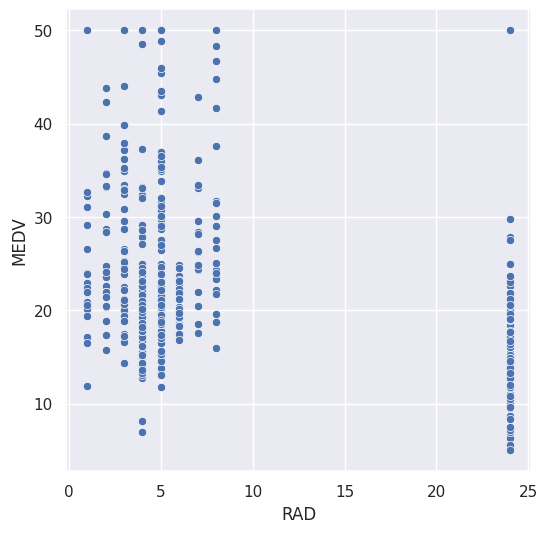

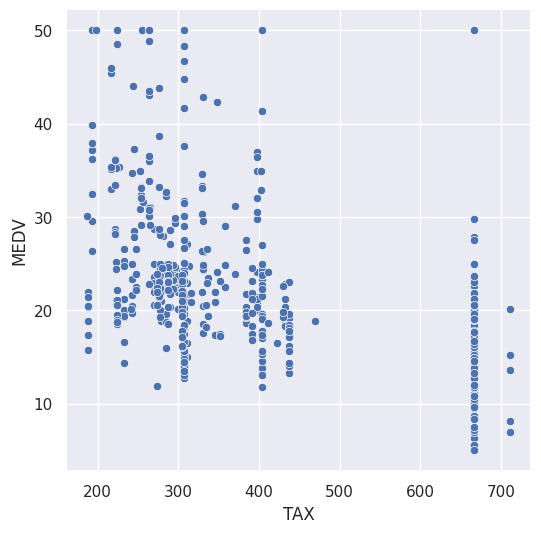

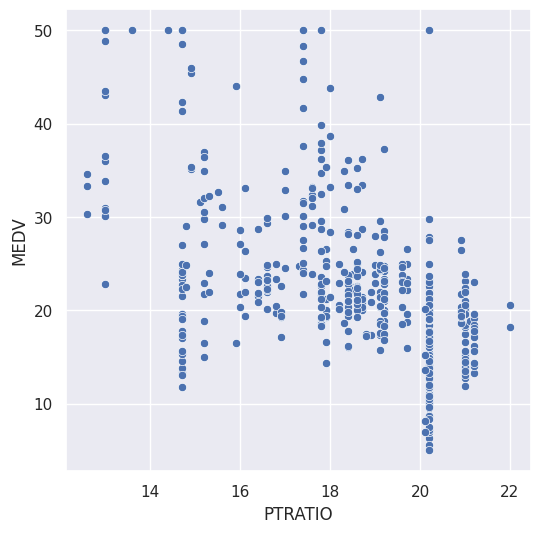

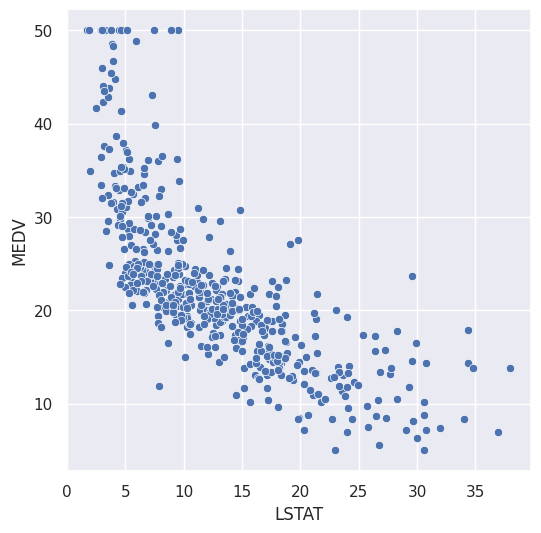

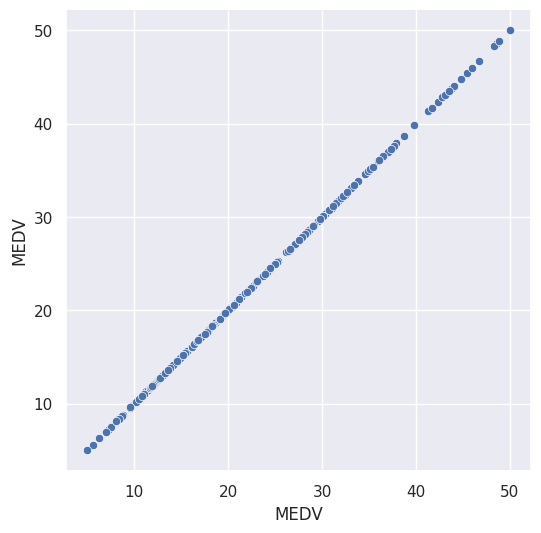

In [ ]:
# let's plot the scatterplots of median price with all the features
for i in df.columns:
  plt.figure(figsize = (6,6))
  sns.scatterplot(data =df,x=i,y="MEDV")
  plt.show()

**Plot the correlation heatmap and list your observations.**

<ipython-input-46-a99237399020>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, vmin=-1, vmax=1,fmt=".2f",cmap="Spectral")


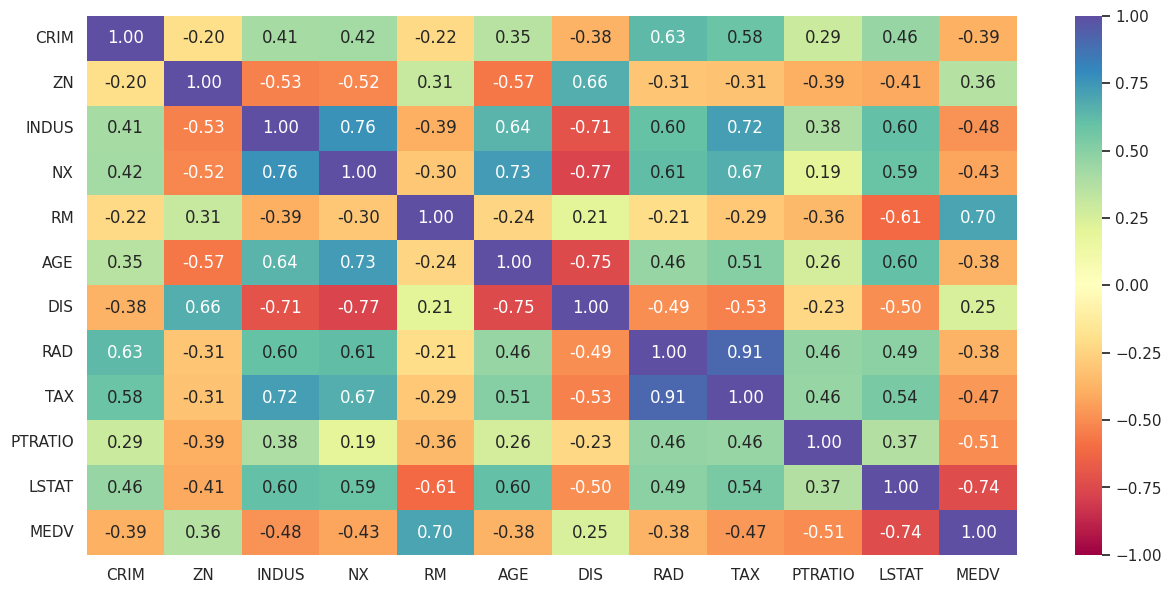

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot = True, vmin=-1, vmax=1,fmt=".2f",cmap="Spectral")
plt.show()

### Split the dataset

Split the data into the dependent and independent variables, create dummy variables for the categorical variables, add a constant to the independent variables, and further split it in a ratio of 70:30 for train and test sets.

In [ ]:
# Split the data into the dependent and independent variables
x= df.drop("MEDV", axis =1)
y= df["MEDV"]

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 47.6+ KB


In [ ]:
# creating dummy variables
x=pd.get_dummies(
    x,columns=x.select_dtypes(include=["object","category"]).columns.tolist(),drop_first= True,
)
x.head()

,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0


In [ ]:
# Add constant term to the dataset
x=sm.add_constant(x)
x.head()

,const,CRIM,ZN,INDUS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,CHAS_yes
0,1.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,0
1,1.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,0
2,1.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,0
3,1.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,0
4,1.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,0


In [ ]:
#Splitting the data in 70:30 ratio for train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state =1)

### Model Building

**Make the linear model using statsmodels OLS and print the model summary.**

In [ ]:
model=sm.OLS(y_train,x_train)
fit_model = model.fit()
print(fit_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           2.38e-83
Time:                        03:45:07   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

In [ ]:
model=sm.OLS(y_train,x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     68.69
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           2.38e-83
Time:                        03:45:30   Log-Likelihood:                -1063.0
No. Observations:                 354   AIC:                             2152.
Df Residuals:                     341   BIC:                             2202.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.8852      6.107      8.168      0.0

**Get the value of the coefficient of determination.**

In [ ]:
print("The coefficient of determination (R-squared) is ", model.rsquared)

The coefficient of determination (R-squared) is  0.7073732058856179


**Get the predictions on test set**

In [ ]:
y_pred=model.predict(x_test)
y_pred.head(20)

307    32.401501
343    27.887341
47     17.737617
67     21.686439
362    18.642772
132    19.940947
292    32.708550
31     17.945383
218    24.606120
90     26.825243
481    26.900962
344    28.611485
119    21.069270
66     27.148848
312    23.289506
407    20.971287
376    16.497529
225    37.417409
201    30.731582
147     7.859318
dtype: float64

<Axes: ylabel='Count'>

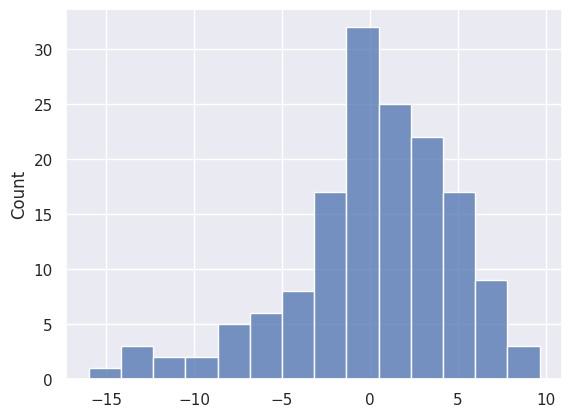

In [ ]:
 error =y_pred- y_test
 error
 sns.histplot(error)

**Calculate MSE for training set**

In [ ]:
print("The Mean Square Error (MSE) of the model for the training set is ", mean_squared_error(y_train,model.predict(x_train)))

The Mean Square Error (MSE) of the model for the training set is  23.758095295443866


**Calculate MSE for test set**

In [ ]:
print("The Mean Square Error (MSE) of the model for the training set is ", mean_squared_error(y_test,model.predict(x_test)))

The Mean Square Error (MSE) of the model for the training set is  20.88178020261418


**Get the RMSE on training set**

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the training set is ",
    np.sqrt(mean_squared_error(y_train, model.predict(x_train))),
)

The Root Mean Square Error (RMSE) of the model for the training set is  4.874227661429436


**Get the RMSE on test set**

In [ ]:
print(
    "The Root Mean Square Error (RMSE) of the model for the test set is ",
    np.sqrt(mean_squared_error(y_test, model.predict(x_test))),
)

The Root Mean Square Error (RMSE) of the model for the test set is  4.569658652745758


**Conclusion:**